In [36]:
DATA_DIR = '/data/cmpe257-02-fa2019/team-1-meerkats/rsna-intracranial-hemorrhage-detection/'

In [37]:
import pandas as pd
def read_trainset(filename=DATA_DIR+"stage_2_train.csv"):
    df = pd.read_csv(filename)
    df["Image"] = df["ID"].str.slice(stop=12)
    df["Diagnosis"] = df["ID"].str.slice(start=13)
    
    duplicates_to_remove = [
        56346,56347,56348,56349,
        56350,56351,1171830,1171831,
        1171832,1171833,1171834,1171835,
        3705312,3705313,3705314,3705315,
        3705316,3705317,3842478,3842479,
        3842480,3842481,3842482,3842483
    ]
    
    df = df.drop(index=duplicates_to_remove)
    df = df.reset_index(drop=True)
    
    df = df.loc[:, ["Label", "Diagnosis", "Image"]]
    df = df.set_index(['Image', 'Diagnosis']).unstack(level=-1)
    
    return df

In [38]:
df=read_trainset()

In [39]:
1-sum(df['Label']['any'])/len(df)

0.8566251728539871

In [40]:
df['Label']

Diagnosis,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
Image,,,,,,
ID_000012eaf,0,0,0,0,0,0
ID_000039fa0,0,0,0,0,0,0
ID_00005679d,0,0,0,0,0,0
ID_00008ce3c,0,0,0,0,0,0
ID_0000950d7,0,0,0,0,0,0
...,...,...,...,...,...,...
ID_ffff82e46,0,0,0,0,0,0
ID_ffff922b9,1,0,0,1,0,0
ID_ffffb670a,1,0,0,0,1,0


In [41]:
len(df)

752803

In [43]:
diagnoses = df['Label'].sum()/df['Label']['any'].sum()
diagnoses = diagnoses.drop('any')

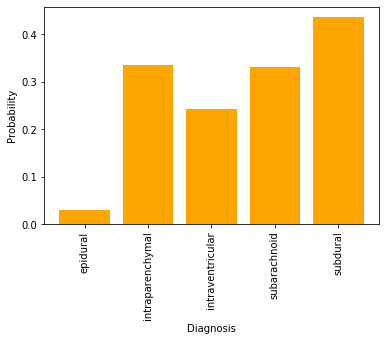

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(diagnoses.keys(), height = diagnoses.values, color='orange')
plt.xlabel('Diagnosis')
plt.ylabel('Probability')
plt.xticks(rotation='vertical')
plt.show()

In [49]:
!conda install scikit-learn


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/linux-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

ConnectionError(MaxRetryError("HTTPSConnectionPool(host='repo.anaconda.com', port=443): Max retries exceeded with url: /pkgs/main/linux-64/current_repodata.json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fc4cee65090>: Failed to establish a new connection: [Errno -2] Name or service not known'))"))




In [48]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/home/013855803/anaconda3/envs/brainenv/lib/python3.7/site-packages/sklearn/metrics/__init__.py)